## Steady State Model for Doubly Fed Induction Generator (EE5703 Assigment) 
1. The task for the Assigment is to model a Doubly Fed Induction Generator operating in steady state for a Wind Turbine Application. 
2. Develop the model for steady state from the space vector based equations. Assume that there is a rotor voltage space vector available. 
3. Find the expressions for the stator electrical power and rotor electrical power. 
4. The rotor voltage space vector can be controlled to have a magnitude from 0 to 1p.u. and any angle
5. What would be the rotor current if the power delivered to the grid is -0.5 p.u ? 
6. Draw the curve of rotor current magnitude when the slip is varied between pull-out slip to zero slip
7. What is the power factor at the stator and the power factor at rotor end connected to grid (assuming only sinusoidal quantities)? [An AC/DC converter connected to grid feeds a DC link, a DC to AC converter is connected to DC bus. The AC end of DC to AC converter is connected to the rotor terminals to provide $\vec
{v}_r$]
8. Draw the curve of rotor power as the slip changes
9. *Bonus Points* Draw the curve for change in rotor current and rotor power if the rotor voltage magnitude is changes with respect to stator voltage (which is fixed at grid voltage) 


Use the following normalized parameters of the motor 

In [1]:
mach_ma = {"rs": 0.015, "rr": 0.04, "lh": 2.31, "ls": 2.35, "lr": 2.35, "tmech":596.9}

## Submission
1. Please submit the assignment in canvas folder by the **end of the week13 (Sunday 19 Nov 2023)**
2. *Please rename the file as your  MatriNo_Name_Assn1**
3. You may submit the jupyter notebook format or you can submit as pdf
4. To generate pdf, in jupyter notebook go to File> Download as> and choose the format (.ipynb or .pdf)

For more information on how to use Markdown cells in jupyter notebook (https://jupyter-notebook.readthedocs.io/en/stable/notebook.html), please refer to 
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html

### How to write equations in Markdown? 
You can select a cell in jupyter notebook as Markdown. Equations can be written using latex syntax as below 

$$\frac{dx}{dt} +  = y$$

or 
\begin{align}
\frac{dx_1}{d\tau} & = -\frac{1}{\tau_1}x_1 + bx_2 + K_1u_1 \\
\frac{dx_2}{d\tau} &= -\frac{1}{\tau_2}x_2 + b_2x_1 + k_2u_1
\end{align}

### Solving complex circuits
Suppolse an AC cicuit is made of 2 paralell branches given as complex impedance. We can solve this using python as a calculator

In [2]:
z1 = complex(0.01, 3.5)
print(z1)
z2 = complex(1.0,3.6)
print(z2)
#The paralle combination is given as 
zp = z1*z2/(z1 + z2)
print("Parallel impedance = {0:3.2f}".format(zp))
#If normalized voltage is 1 p.u., as a complex quantity can either be given as complex(1.0,0) or complex(0,1.0). 
#Find the totla current drawn
v = complex(1.0,0)
is1 = v/zp
print("The stator current is = {0:3.2f}".format(is1))

(0.01+3.5j)
(1+3.6j)
Parallel impedance = 0.24+1.81j
The stator current is = 0.07-0.54j


In [3]:
import numpy as np
import matplotlib.pyplot as plt
#Real power 
S = np.conj(v)*is1
P = S.real
print("Apparent Power S = {0:3.2f} and real power is P = {1:3.2f}".format(S,P))
print("Power Factor is $cos phi$ = {0:3.3f}".format(P/np.abs(S)))

Apparent Power S = 0.07-0.54j and real power is P = 0.07
Power Factor is $cos phi$ = 0.132


### Steady State Space Vector Circuit Model:

\begin{align}
v_s&=[r_s+j(X_s+X_m)]i_s+jX_m i_r=Z_s i_s + jX_m i_r\\
v_r&=[r_r+js(X_r+X_m)]i_r+jsX_m i_s = Z_r i_r + jsX_m i_s
\end{align}
where:
$$X_s=\omega_s \sigma_s l_h, \, X_r=\omega_s \sigma_r l_h, \,X_m=\omega_s l_h.$$

i.e.
$$
\begin{bmatrix}
Z_s  &jX_m \\
jsX_m &Z_r
\end{bmatrix}
\begin{bmatrix}
i_s \\
i_r
\end{bmatrix}
=
\begin{bmatrix}
v_s \\
v_r
\end{bmatrix}
$$

$$
\begin{bmatrix}
i_s \\
i_r
\end{bmatrix}
=
\frac{1}{Z_r Z_s +sX_m^2}
\begin{bmatrix}
Z_r  &-jX_m \\
-jsX_m &Z_s
\end{bmatrix}
\begin{bmatrix}
v_s \\
v_r
\end{bmatrix}
$$

In [4]:
def mach_Tpara(dict):
    rs = dict["rs"]
    rr = dict["rr"]
    lh = dict["lh"]
    ls = dict["ls"]
    lr = dict["lr"]
    sig= 1-(lh*lh)/(lr*ls)
    kr=lh/lr
    sigs= ls- lh
    sigr = lr - lh
    lsigss = sigs*lh
    lsigrr = sigr*lh
    
#     print(ls)
    return rs,rr,lh,ls,lr,sig,lsigss,lsigrr

In [20]:
def SSDFIG(mach_dict,vs:float,vr:complex,ws:float,s:float):
    rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_dict)
    zs = complex(real=rs,imag=ws*(lsigss+lh))
    zr = complex(real=rr,imag=s*ws*(lsigrr+lh))
    zh = complex(real=0,imag=ws*lh)
    za = zr*zs-s*zh**2
    i_s = (vs*zr-vr*zh)/za
    i_r = (vr*zs-vs*s*zh)/za
    irmag = np.abs(i_r)
    irang = np.angle(i_r)
    P_s = complex(np.conj(vs*i_s)).real
    P_r = complex(np.conj(vr*i_r)).real
    pfs = P_s/np.abs(np.conj(vs*i_s))
    pfr = P_r/np.abs(np.conj(vr*i_r))
    w = ws*(1-s)
    return irmag, P_s, P_r, pfs, pfr, irang

In [26]:
# svar = np.arange(-0.0001,1.0,0.001)
svar = np.arange(-1.0,1.0,0.01)
irmag = np.zeros(len(svar))
ps = np.zeros(len(svar))
pr = np.zeros(len(svar))
pfs = np.zeros(len(svar))
pfr = np.zeros(len(svar))
irang = np.zeros(len(svar))
for ii,sn in enumerate(svar):
    yy = SSDFIG(mach_ma,1.0,complex(0.2,0.0),1.0,sn)
    irmag[ii] = yy[0]
    ps[ii] = yy[1]
    pr[ii] = yy[2]
    pfs[ii] = yy[3]
    pfr[ii] = yy[4]
    irang[ii] = yy[5]


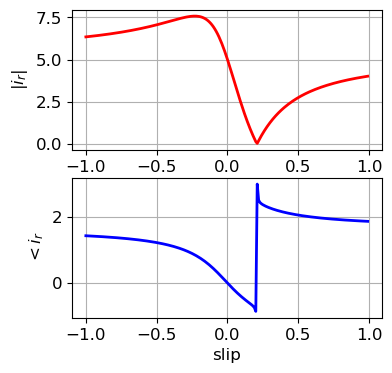

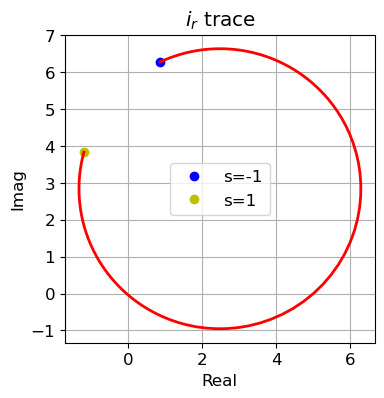

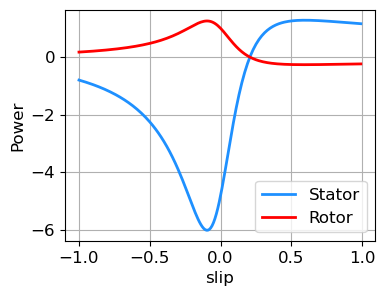

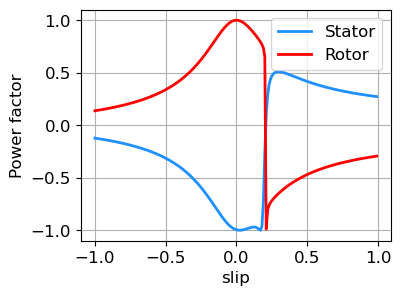

In [38]:
plt.figure(101, figsize = (4,4))
plt.rc('font', size = 12)
plt.subplot(2,1,1)
plt.grid()
plt.plot(svar,irmag,'r',lw = 2, label = "ir mag - slip")
plt.ylabel('$|i_r|$')
plt.subplot(2,1,2)
plt.grid()
plt.plot(svar,irang,'b',lw = 2, label = "ir mag - slip")
plt.ylabel('$<i_r$')
plt.xlabel('slip')

plt.figure(104, figsize = (4,4))
plt.rc('font', size = 12)
plt.grid()
plt.title("$i_r$ trace")
plt.plot(irmag[0]*np.cos(irang[0]),irmag[0]*np.sin(irang[0]),'bo',lw=8)
plt.plot(irmag[len(svar)-1]*np.cos(irang[len(svar)-1]),irmag[len(svar)-1]*np.sin(irang[len(svar)-1]),'yo',lw=8)
plt.plot(irmag*np.cos(irang),irmag*np.sin(irang),'r',lw = 2, label = "ir mag - slip")
plt.xlabel('Real')
plt.ylabel('Imag')
plt.legend(['s=-1','s=1'])

plt.figure(102, figsize = (4,3))
plt.rc('font', size = 12)
plt.grid()
plt.plot(svar,ps,'dodgerblue',lw = 2, label = "power - slip")
plt.plot(svar,pr,'r',lw = 2,label="power - slip")
plt.ylabel('Power')
plt.xlabel('slip')
plt.legend(["Stator","Rotor"])

plt.figure(103, figsize = (4,3))
plt.rc('font', size = 12)
plt.grid()
plt.plot(svar,pfs,'dodgerblue',lw = 2, label = "power factor - slip")
plt.plot(svar,pfr,'r',lw = 2,label="power factor - slip")
plt.ylabel('Power factor')
plt.xlabel('slip')
plt.legend(["Stator","Rotor"])
